In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import os
import sys

root_path = os.path.abspath(os.path.join('..'))

if root_path not in sys.path:
    sys.path.append(root_path)

In [2]:
#importing fucntions from src folder 

from src.preprocessing import load_and_clean_data,rename_columns,calculate_summary_stats
from src.elasticity_model import fit_elasticity_model,get_elasticity, get_model_summary 
from src.simulation import simulate_price_scenerios


In [3]:
# plot style 
sns.set(style="whitegrid")

#settin paths
DATA_PATH= os.path.join(root_path,'data','supermarket_sales.csv')
OUTPUT_PATH="outputs"
os.makedirs(OUTPUT_PATH,exist_ok=True)

In [4]:
#Load and clean the data set 

df= load_and_clean_data(DATA_PATH)
df= rename_columns(df)
print("Data Loaded successfully")
display(df.head())

removed0 rows with non-positive price or quantity
Data Loaded successfully


,Invoice ID,Branch,City,Customer type,Gender,Product line,price,quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3


In [5]:
#summary statistics 
stats= calculate_summary_stats(df)
print("Summary statistics")

for u,v in stats.items():
    print(f"{u}:{v}")

Summary statistics
mean_price:55.67213
median_price:55.230000000000004
std_price:26.49462834791978
mean_quantity:5.51
median_quantity:5.0
std_quantity:2.923430595455696
n_observations:1000


In [6]:
#save the summary stats 
pd.DataFrame([stats]).to_csv(f"{OUTPUT_PATH}/summary_stats.csv", index=False)

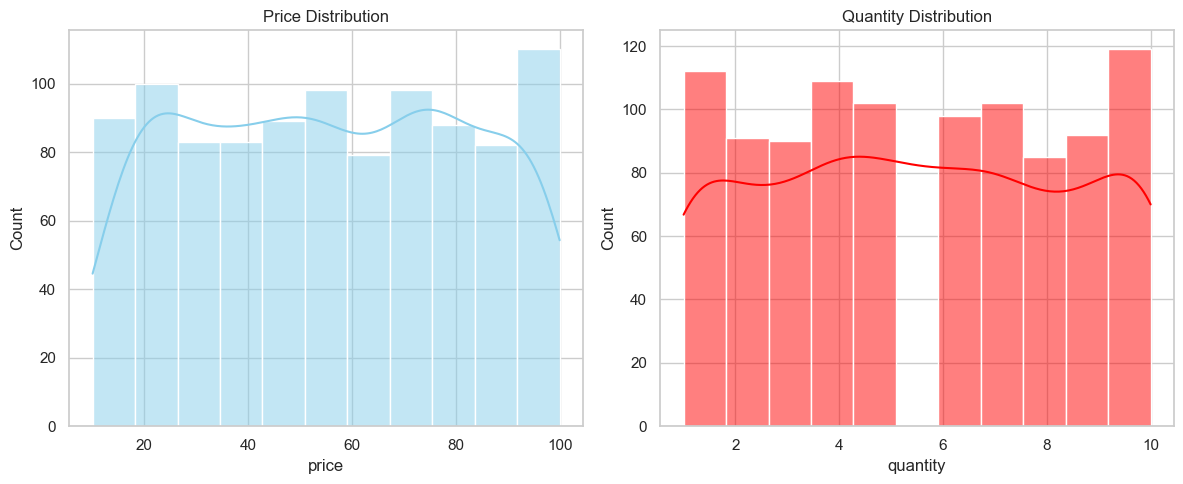

In [7]:
#visualize the distribution 
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['price'],kde=True,color='skyblue')
plt.title('Price Distribution')

plt.subplot(1,2,2)
sns.histplot(df['quantity'],kde="True",color='red')
plt.title('Quantity Distribution')

plt.tight_layout()
plt.savefig(f"{OUTPUT_PATH}/price_quantity_distribution.png")
plt.show()


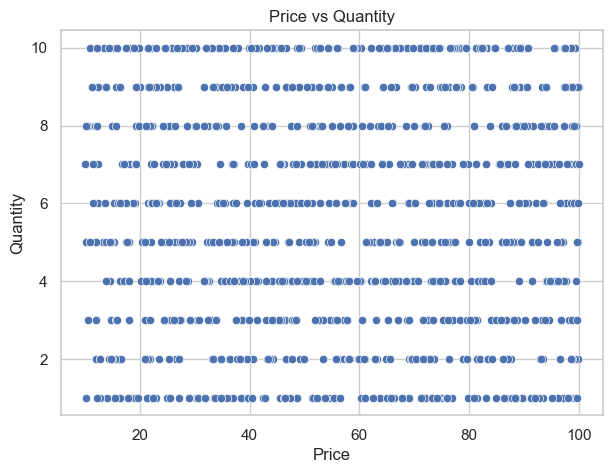

In [8]:
#scatter plot : price vs quantity 

plt.figure(figsize=(7,5))
sns.scatterplot(x='price',y='quantity',data=df)
plt.title("Price vs Quantity")
plt.xlabel("Price")
plt.ylabel("Quantity")
plt.savefig(f"{OUTPUT_PATH}/price_vs_quantity.png")
plt.show()

Correlation matrix
             price  quantity
price     1.000000  0.010778
quantity  0.010778  1.000000


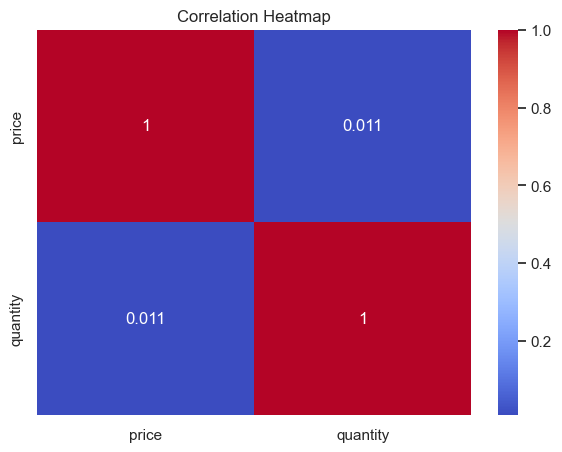

In [9]:
#correlation matrix
corr= df[['price','quantity']].corr()
print("Correlation matrix")
print(corr)

plt.figure(figsize=(7,5))
sns.heatmap(corr,annot=True,cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.savefig(f"{OUTPUT_PATH}/correlation_heatmap.png")
plt.show()

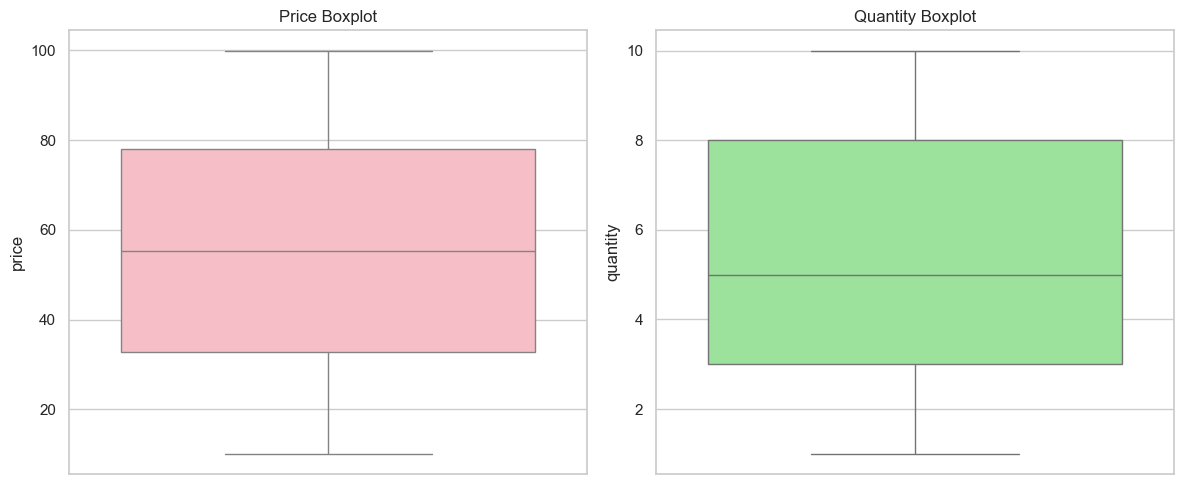

In [10]:
#Boxplot to detect outliers 

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(y='price',data=df,color='lightpink')
plt.title("Price Boxplot")

plt.subplot(1,2,2)
sns.boxplot(y='quantity',data=df,color='lightgreen')
plt.title("Quantity Boxplot")

plt.tight_layout()
plt.savefig(f"{OUTPUT_PATH}/boxplot.png")
plt.show()



In [11]:
#Fit elasticity model 
model=fit_elasticity_model(df)
elasticity= get_elasticity(model)
model_summary=get_model_summary(model)
print(f"Price Elasticity:{elasticity}")
print(f"Model Summary:{model_summary}")

Price Elasticity:0.006191874594031477
Model Summary:{'elasticity': np.float64(0.006191874594031477), 'r_squared': np.float64(2.6322872620943016e-05), 'adj_r_squared': np.float64(-0.0009756547597712384), 'p_values': const    4.416875e-22
price    8.712733e-01
dtype: float64, 'std_errors': const    0.149610
price    0.038202
dtype: float64, 'n_observations': 1000}


In [12]:
#simulate price scenerios 
scenerios= simulate_price_scenerios(
    current_price=df['price'].mean(),
    current_quantity=df['quantity'].mean(),
    elasticity=elasticity
)
print("Simulated price scenerios:")
display(scenerios)

scenerios.to_csv(f"{OUTPUT_PATH}/simulated_price_scenerios.csv",index=False)


Simulated price scenerios:


,price_change_pct,current_price,new_price,current_quantity,new_quantity,quantity_change_pct,current_revenue,new_revenue,revenue_change_pct
0,-20,55.67213,44.537704,5.51,5.503177,-0.123837,306.753436,245.098848,-20.099070
1,-10,55.67213,50.104917,5.51,5.506588,-0.061919,306.753436,275.907149,-10.055727
2,-5,55.67213,52.888523,5.51,5.508294,-0.030959,306.753436,291.325544,-5.029411
3,5,55.67213,58.455737,5.51,5.511706,0.030959,306.753436,322.190826,5.032507
4,10,55.67213,61.239343,5.51,5.513412,0.061919,306.753436,337.637712,10.068111
5,20,55.67213,66.806556,5.51,5.516823,0.123837,306.753436,368.559974,20.148605
